In [1]:
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from utils import *
import torch
from torch.nn.utils.parametrizations import orthogonal


In [69]:
save_path = './causal_neurons/deit_b_16_imagenet9_greyout/flip-False/blocks.10'
metrics = []
for fname in os.listdir(save_path):
    metrics.append(str_to_dict(fname))
    print(fname)
df = pd.DataFrame(metrics)

accdiff=0.007929_lossdiff=0.02740_l1reg=0.01083
accdiff=-0.00003892_lossdiff=0.01512_l1reg=0.01424
accdiff=0._lossdiff=0.001679_l1reg=0.4139
accdiff=-0.00003892_lossdiff=0.01521_l1reg=0.005889
accdiff=-0.00003892_lossdiff=0.01542_l1reg=0.01638
accdiff=0.005937_lossdiff=0.02134_l1reg=0.005244
accdiff=0.003945_lossdiff=0.01498_l1reg=0.009533
accdiff=0.003945_lossdiff=0.01354_l1reg=0.008270
accdiff=0.007890_lossdiff=0.01889_l1reg=0.006819
accdiff=0.003945_lossdiff=0.008699_l1reg=0.2081
accdiff=0.009882_lossdiff=0.02113_l1reg=0.005323
accdiff=0.003945_lossdiff=0.009681_l1reg=0.1315
accdiff=0.003945_lossdiff=0.01731_l1reg=0.005406
accdiff=0.005937_lossdiff=0.01380_l1reg=0.008018
accdiff=0.005937_lossdiff=0.01980_l1reg=0.01523
accdiff=0._lossdiff=0.003270_l1reg=0.3342


In [2]:
weights_bases_list = [
                    # torch.load('./causal_neurons/deit_b_16_imagenet9_greyout/flip-True/norm/accdiff=-0.003945_lossdiff=0.008202_l1reg=0.01447/weights_bases_param.pt',
                    #              map_location=torch.device('cpu')),
                    # torch.load('./causal_neurons/deit_b_16_imagenet9_greyout/flip-False/norm/accdiff=0._lossdiff=0.0119_l1reg=0.01110/weights_bases_param.pt',
                    #             map_location=torch.device('cpu')),
                    torch.load('./causal_neurons/deit_b_16_imagenet9_greyout/flip-True/blocks.10/accdiff=0.01578_lossdiff=0.04700_l1reg=0.00993/weights_bases_param.pt',
                                map_location=torch.device('cpu')),
                    torch.load('./causal_neurons/deit_b_16_imagenet9_greyout/flip-False/blocks.10/accdiff=-0.00003892_lossdiff=0.01521_l1reg=0.005889/weights_bases_param.pt',
                                map_location=torch.device('cpu')),
                    ]

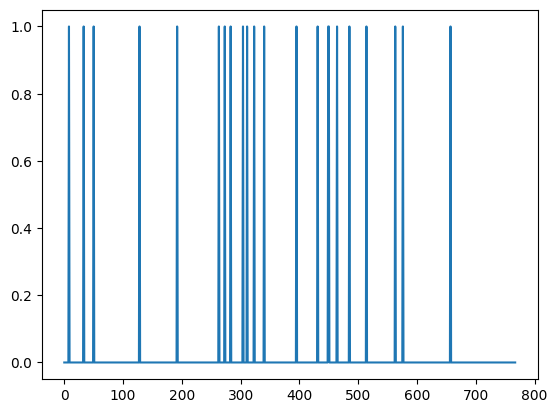

In [71]:
plt.plot(torch.sigmoid(weights_bases_list[-1]['weights']['blocks.10'])[0].detach().numpy()[1:,:].sum(axis=0).clip(0,1) > 0.999)

In [3]:
causal_bases_list = []
hook = 'blocks.10'
for weights_bases in weights_bases_list:
    # thresh = 0.05
    thresh = 2
    # mask = torch.sigmoid(weights_bases['weights']['norm']).squeeze() > thresh
    mask = torch.sigmoid(weights_bases['weights'][hook]).squeeze()[1:,:].sum(axis=0) > thresh
    bases = orthogonal(torch.nn.Linear(768, 768, bias=False))
    bases.load_state_dict(weights_bases['bases'][hook])
    causal_bases = bases.weight.T[mask].detach()
    causal_bases_list.append(causal_bases)

In [25]:
mask = torch.sigmoid(weights_bases_list[0]['weights']['norm']).squeeze() > thresh
mask2 = torch.sigmoid(weights_bases_list[1]['weights']['norm']).squeeze() > thresh


In [38]:
(causal_bases_list[0]@causal_bases_list[1].T).abs().mean()

tensor(0.0546)

In [4]:
(causal_bases_list[0]@causal_bases_list[1].T).abs().mean()

tensor(nan)

In [6]:
causal_bases_list[0]

tensor([[-0.0134, -0.0019,  0.0200,  ..., -0.0577,  0.0684,  0.0284],
        [ 0.0290, -0.0192,  0.0560,  ..., -0.0276, -0.0170,  0.0630],
        [-0.0262,  0.0098,  0.0329,  ...,  0.0196, -0.0315, -0.0105],
        [ 0.0160, -0.0460, -0.0693,  ...,  0.0288,  0.0051,  0.0035],
        [ 0.0250,  0.0743,  0.0144,  ..., -0.0160,  0.0262, -0.0095],
        [-0.0579,  0.0519,  0.0309,  ..., -0.0035, -0.0414, -0.0520]])

In [ ]:
plt.plot(to_numpy(torch.sigmoid(weights_bases['weights']['norm']).squeeze()))

AttributeError: 'list' object has no attribute 'sum'

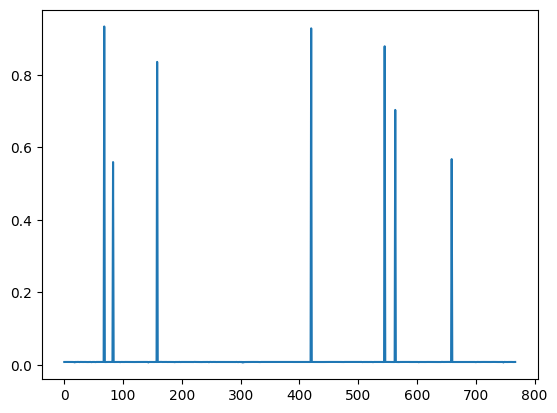

In [15]:
plt.plot(to_numpy(torch.sigmoid(weights_bases['weights']['norm']).squeeze()))

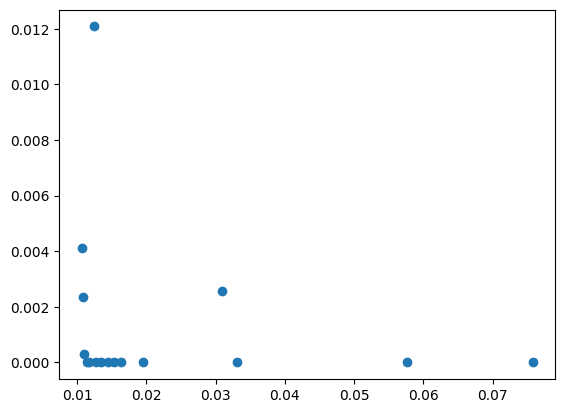

In [40]:
plt.scatter(df['l1reg'], df['lossdiff'])

In [ ]:
1+1

In [25]:
!ls ./causal_neurons/flip-True/

ls: ./causal_neurons/flip-True/: No such file or directory
